In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("All imports successful!")


All imports successful!


In [2]:
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)


100%|██████████| 172k/172k [00:00<00:00, 7.60MB/s]

Extracting files...
Path to dataset files: /Users/lokeshue/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
import os

os.listdir(path)


['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [4]:
import shutil

source_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
destination_file = "../data/customer_data.csv"

shutil.copy(source_file, destination_file)

print("Copied to data/customer_data.csv")


Copied to data/customer_data.csv


In [5]:
os.listdir("../data")


['customer_data.csv']

In [6]:
import pandas as pd

df = pd.read_csv("../data/customer_data.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape


(7043, 21)

In [9]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df = df.dropna()
df.shape


(7032, 21)

In [13]:
df["Revenue"] = df["MonthlyCharges"] * df["tenure"]
df[["MonthlyCharges", "tenure", "Revenue"]].head()


,MonthlyCharges,tenure,Revenue
0,29.85,1,29.85
1,56.95,34,1936.30
2,53.85,2,107.70
3,42.30,45,1903.50
4,70.70,2,141.40


In [14]:
total_customers = df.shape[0]
churn_rate = (df["Churn"] == "Yes").mean() * 100
avg_monthly = df["MonthlyCharges"].mean()
avg_tenure = df["tenure"].mean()
total_revenue = df["Revenue"].sum()

print("Total Customers:", total_customers)
print("Churn Rate (%):", round(churn_rate, 2))
print("Average Monthly Charges:", round(avg_monthly, 2))
print("Average Tenure (months):", round(avg_tenure, 2))
print("Total Revenue:", round(total_revenue, 2))


Total Customers: 7032
Churn Rate (%): 26.58
Average Monthly Charges: 64.8
Average Tenure (months): 32.42
Total Revenue: 16055091.45


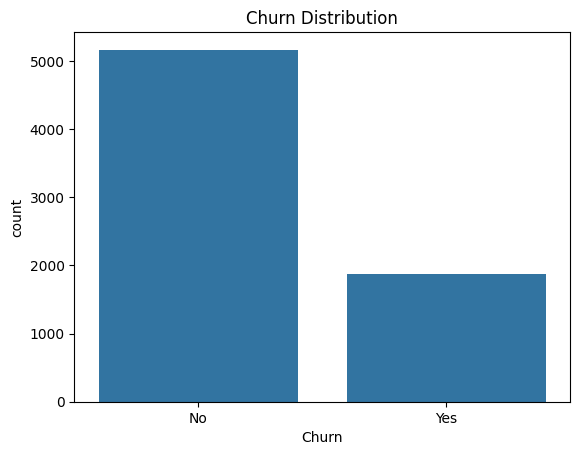

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [16]:
contract_churn = (
    df.groupby("Contract")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .sort_values(ascending=False)
)

contract_churn


Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64

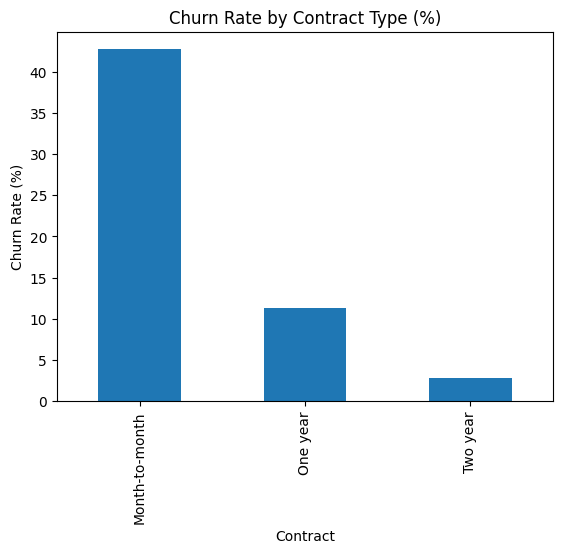

In [17]:
contract_churn.plot(kind="bar")
plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Churn Rate (%)")
plt.show()


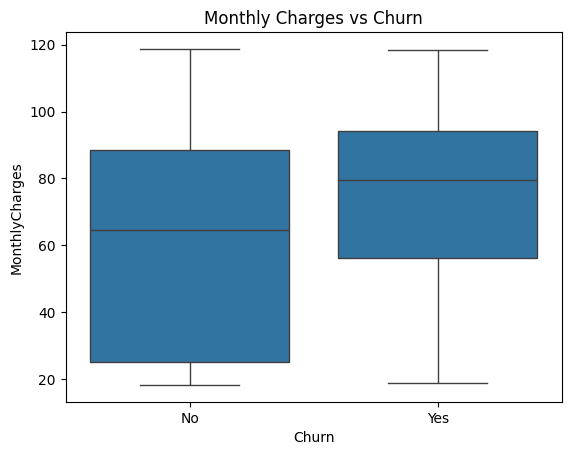

In [18]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [19]:
rev_by_contract = df.groupby("Contract")["Revenue"].mean().sort_values(ascending=False)
rev_by_contract


Contract
Two year          3728.758249
One year          3031.887262
Month-to-month    1370.115032
Name: Revenue, dtype: float64

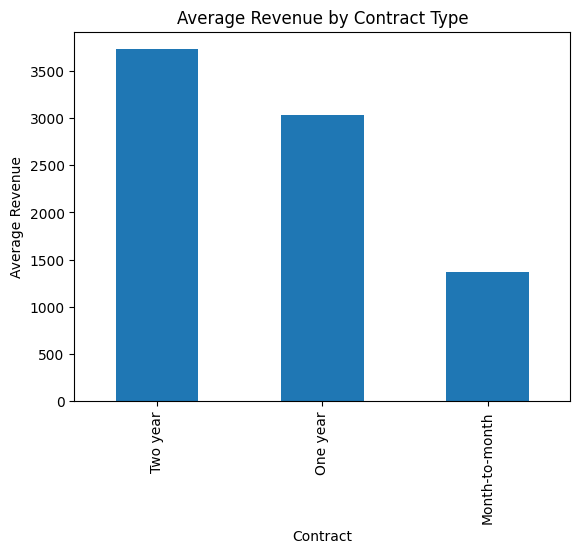

In [20]:
rev_by_contract.plot(kind="bar")
plt.title("Average Revenue by Contract Type")
plt.ylabel("Average Revenue")
plt.show()


In [21]:
import os
os.makedirs("../visuals", exist_ok=True)


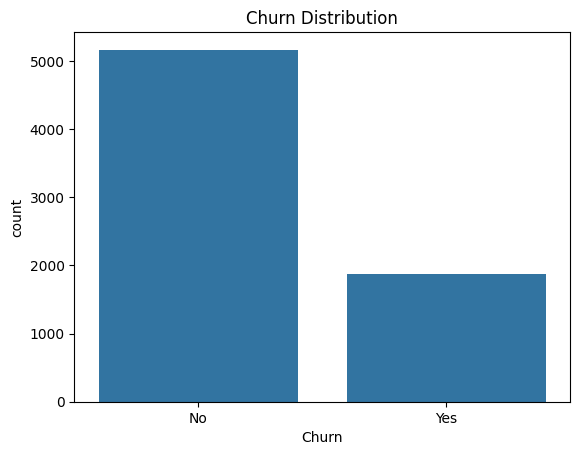

In [22]:
plt.figure()
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.savefig("../visuals/churn_distribution.png", bbox_inches="tight")
plt.show()


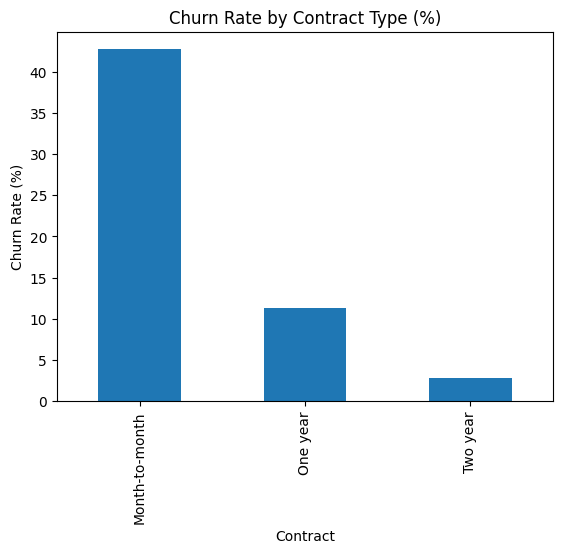

In [23]:
plt.figure()
contract_churn.plot(kind="bar")
plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Churn Rate (%)")
plt.savefig("../visuals/churn_by_contract.png", bbox_inches="tight")
plt.show()


Key Insights:

1.Month-to-month contracts have the highest churn rate

2.Higher monthly charges are associated with increased churn

3.Long-term contracts reduce churn and increase average revenue

Business Recommendations:

1.Encourage month-to-month customers to upgrade to long-term contracts using incentives

2.Identify high monthly charge customers early and run retention campaigns

3.Bundle services to increase customer value and reduce churn